Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters from GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


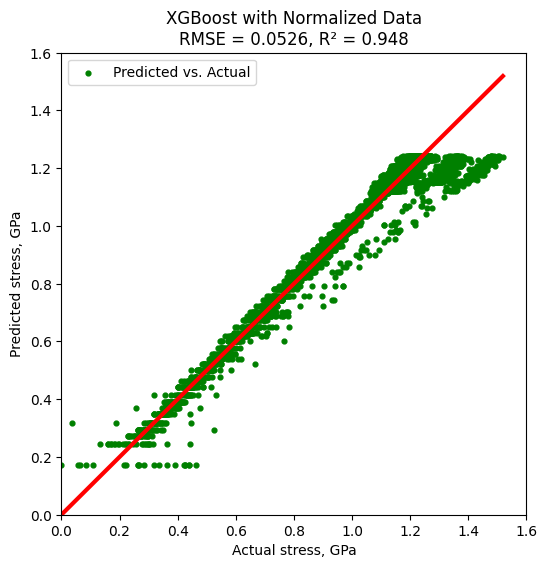

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt

# Loading the data
file_path = 'temp/650.csv'
data = pd.read_csv(file_path)

X = data[['strain']]
y = data['stress']

# Normalizing
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Spliting data into test and train and using 0.2 test split size
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=34)

#Using the extreme gradient boost
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=34)

# Parameters to be tuned for model
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Use GridSearchCV for hyperparameter tuning with cross-validation (5 folds)
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fitting the model with best parameters for GridCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Predicting using the best model parameters
y_pred = best_model.predict(X_test)

#Evaluating the errors: RMSE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


# Cross-validating with best model
cv = KFold(n_splits=5, shuffle=True, random_state=34)
cv_scores = cross_val_score(best_model, X_normalized, y, cv=cv, scoring='neg_mean_squared_error')


# Plotting the actual vs predicted values of stress
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='green', s=12, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=3)
plt.xlabel("Actual stress, GPa")
plt.ylabel("Predicted stress, GPa")
plt.title("Extreme Gradient boost\nRMSE = {:.4f}, R² = {:.3f}".format(rmse, r2))
plt.xlim([0, 1.6])
plt.ylim([0, 1.6])
plt.legend()
plt.show()



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters from GridSearchCV: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


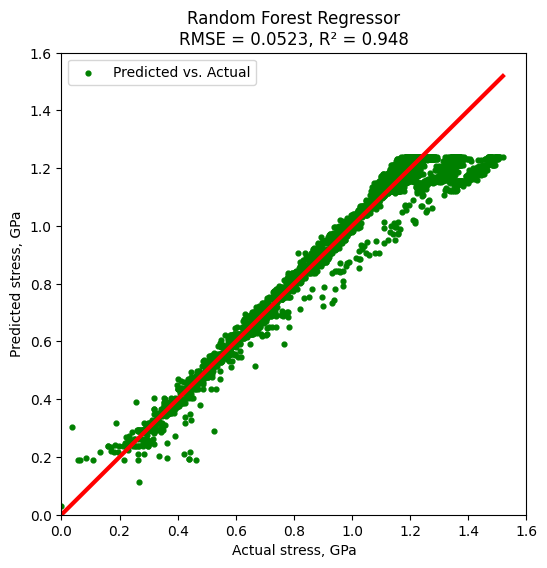

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Loading the data
file_path = 'temp/650.csv'
data = pd.read_csv(file_path)

# Handling missing values by imputation (using mean strategy for simplicity)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy (mean, median, most_frequent)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Extract features and target
X = data_imputed[['strain']]
y = data_imputed['stress']

# Normalizing
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Splitting data into test and train with 0.2 test size
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=34)

# Using Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=34)

# Parameters to be tuned for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [3, 5, 7],                    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

# Use GridSearchCV for hyperparameter tuning with cross-validation (5 folds)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fitting the model with best parameters for GridSearchCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Predicting using the best model parameters
y_pred = best_model.predict(X_test)

# Evaluating the errors: RMSE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Cross-validating with best model
cv = KFold(n_splits=5, shuffle=True, random_state=34)
cv_scores = cross_val_score(best_model, X_normalized, y, cv=cv, scoring='neg_mean_squared_error')

# Plotting the actual vs predicted values of stress
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='green', s=12, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=3)
plt.xlabel("Actual stress, GPa")
plt.ylabel("Predicted stress, GPa")
plt.title("Random Forest Regressor\nRMSE = {:.4f}, R² = {:.3f}".format(rmse, r2))
plt.xlim([0, 1.6])
plt.ylim([0, 1.6])
plt.legend()
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters from GridSearchCV: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


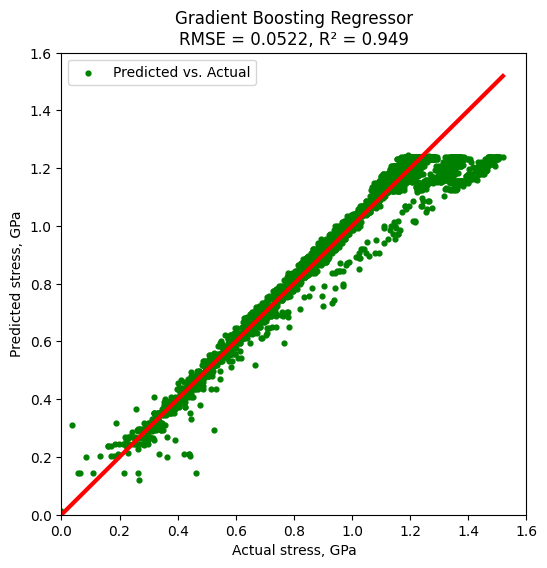

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Loading the data
file_path = 'temp/650.csv'
data = pd.read_csv(file_path)

# Handling missing values by imputation (using mean strategy for simplicity)
imputer = SimpleImputer(strategy='mean')  # You can change the strategy (mean, median, most_frequent)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Extract features and target
X = data_imputed[['strain']]
y = data_imputed['stress']

# Normalizing
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Splitting data into test and train with 0.2 test size
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=34)

# Using Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=34)

# Parameters to be tuned for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1],       # Step size shrinkage to prevent overfitting
    'max_depth': [3, 5, 7],                    # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]               # Minimum number of samples required to be at a leaf node
}

# Use GridSearchCV for hyperparameter tuning with cross-validation (5 folds)
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fitting the model with best parameters for GridSearchCV
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print(f"Best parameters from GridSearchCV: {grid_search.best_params_}")

# Predicting using the best model parameters
y_pred = best_model.predict(X_test)

# Evaluating the errors: RMSE, R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Cross-validating with best model
cv = KFold(n_splits=5, shuffle=True, random_state=34)
cv_scores = cross_val_score(best_model, X_normalized, y, cv=cv, scoring='neg_mean_squared_error')

# Plotting the actual vs predicted values of stress
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='green', s=12, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linewidth=3)
plt.xlabel("Actual stress, GPa")
plt.ylabel("Predicted stress, GPa")
plt.title("Gradient Boosting Regressor\nRMSE = {:.4f}, R² = {:.3f}".format(rmse, r2))
plt.xlim([0, 1.6])
plt.ylim([0, 1.6])
plt.legend()
plt.show()
